<a href="https://colab.research.google.com/github/hayya54/IMDB_Sentimen-Analysis/blob/main/22_11_5303_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
df = pd.read_csv(f'{path}/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df_positive = df[df['sentiment'] == 'positive'][:9000]
df_negative = df[df['sentiment'] == 'negative'][:1000]
df_review_imb = pd.concat([df_positive, df_negative])

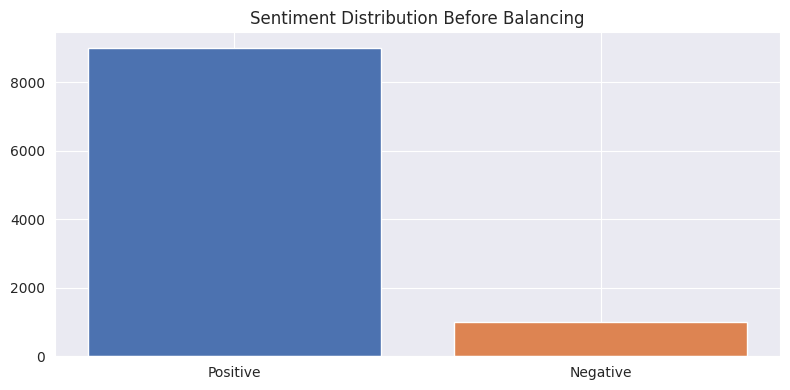

In [ ]:
colors = sns.color_palette('deep')
plt.figure(figsize=(8, 4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df_review_imb['sentiment'].value_counts(), color=colors[:2])
plt.title('Sentiment Distribution Before Balancing')
plt.savefig('sentiment_before.png')
plt.show()

In [ ]:
df_positive = df[df['sentiment'] == 'positive'][:1000]
df_negative = df[df['sentiment'] == 'negative'][:1000]
df_review_bal = pd.concat([df_positive, df_negative])

In [ ]:
print("Sentiment distribution before balancing:")
print(df_review_imb['sentiment'].value_counts())
print("\nSentiment distribution after balancing:")
print(df_review_bal['sentiment'].value_counts())

Sentiment distribution before balancing:
sentiment
positive    9000
negative    1000
Name: count, dtype: int64

Sentiment distribution after balancing:
sentiment
positive    1000
negative    1000
Name: count, dtype: int64


In [ ]:
train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [ ]:
max_words = 5000  # Vocabulary size
max_len = 100     # Sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_x)
train_x_seq = tokenizer.texts_to_sequences(train_x)
test_x_seq = tokenizer.texts_to_sequences(test_x)
train_x_padded = pad_sequences(train_x_seq, maxlen=max_len, padding='post', truncating='post')
test_x_padded = pad_sequences(test_x_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
import pickle
filename = 'tokenizer.pickle'

with open(filename, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Objek tokenizer berhasil disimpan ke {filename}")

Objek tokenizer berhasil disimpan ke tokenizer.pickle


In [ ]:
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)
train_y_encoded = to_categorical(train_y_encoded)
test_y_encoded = to_categorical(test_y_encoded)

In [ ]:
model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x_padded, train_y_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.5185 - loss: 0.6930 - val_accuracy: 0.4515 - val_loss: 0.6949
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.5811 - loss: 0.6807 - val_accuracy: 0.5672 - val_loss: 0.6815
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.7743 - loss: 0.5798 - val_accuracy: 0.7201 - val_loss: 0.5523
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9515 - loss: 0.2193 - val_accuracy: 0.7052 - val_loss: 0.7226
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9801 - loss: 0.0923 - val_accuracy: 0.6978 - val_loss: 0.8812


In [ ]:
test_loss, test_accuracy = model.evaluate(test_x_padded, test_y_encoded, verbose=0)
print("\nModel Accuracy:", test_accuracy)


Model Accuracy: 0.7303030490875244


In [ ]:
test_pred = model.predict(test_x_padded)
test_pred_labels = label_encoder.inverse_transform(np.argmax(test_pred, axis=1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [ ]:
sample_reviews = ['A good movie', 'An excellent movie', 'I did not like this movie at all']
sample_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_seq, maxlen=max_len, padding='post', truncating='post')
sample_pred = model.predict(sample_padded)
sample_pred_labels = label_encoder.inverse_transform(np.argmax(sample_pred, axis=1))
for review, pred in zip(sample_reviews, sample_pred_labels):
    print(f"Prediction for '{review}': {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for 'A good movie': negative
Prediction for 'An excellent movie': negative
Prediction for 'I did not like this movie at all': negative


In [ ]:
print("\nF1-Score:", f1_score(test_y, test_pred_labels, labels=['positive', 'negative'], average=None))
print("\nClassification Report:")
print(classification_report(test_y, test_pred_labels, labels=['positive', 'negative']))


F1-Score: [0.69415808 0.75880759]

Classification Report:
              precision    recall  f1-score   support

    positive       0.79      0.62      0.69       325
    negative       0.69      0.84      0.76       335

    accuracy                           0.73       660
   macro avg       0.74      0.73      0.73       660
weighted avg       0.74      0.73      0.73       660



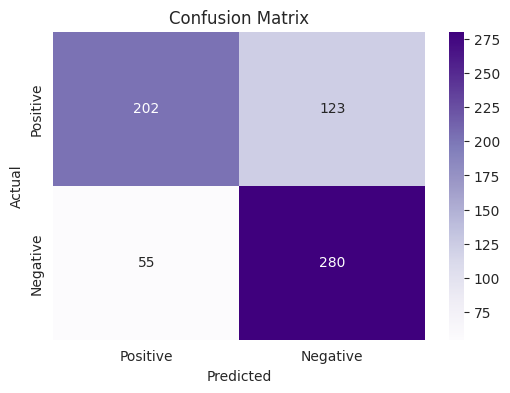

In [ ]:
conf_mat = confusion_matrix(test_y, test_pred_labels, labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

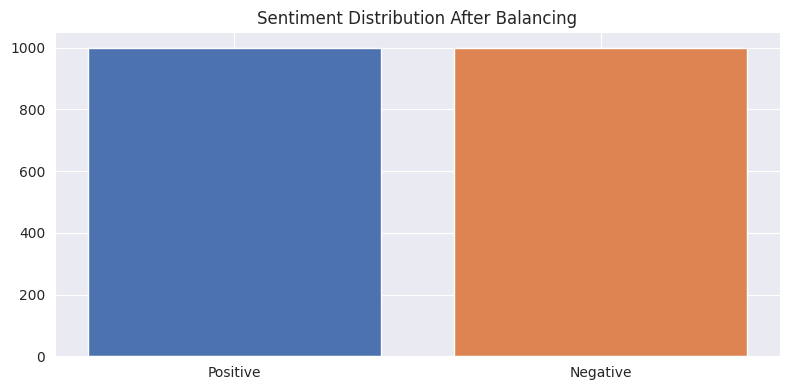

In [ ]:
plt.figure(figsize=(8, 4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df_review_bal['sentiment'].value_counts(), color=colors[:2])
plt.title('Sentiment Distribution After Balancing')
plt.savefig('sentiment_after.png')
plt.show()

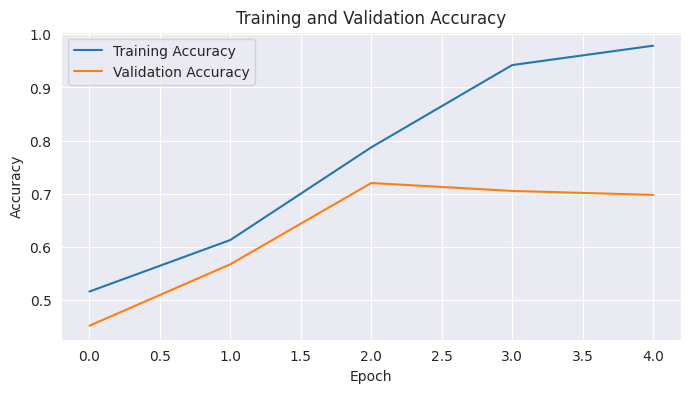

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.show()

In [ ]:
model.save('sentiment_model.h5')